In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [111]:
housing_data = pd.read_csv('./clean_dataset.csv')

In [112]:
housing_data.head()


,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,36.0,True,1000.0,1403.0,NaN,False,W,good
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,0.0,True,977.0,1526.0,NaN,False,F,good
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,0.0,False,0.0,760.0,NaN,False,W,to_renovate
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,0.0,False,0.0,63.0,NaN,False,B,renovated
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,0.0,True,60.0,193.0,NaN,False,B,good


In [6]:
housing_data.columns

Index(['source', 'postcode', 'house_is', 'property_subtype', 'price',
       'rooms_number', 'area', 'equipped_kitchen_has', 'furnished',
       'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area',
       'land_surface', 'facades_number', 'swimming_pool_has', 'region',
       'building_state_agg'],
      dtype='object')

In [ ]:
source', 'price',
       'rooms_number','area', 'equipped_kitchen_has', 'furnished',
       'open_fire',  'terrace_area', , 'garden_area',
       'land_surface', , 'region',
       'building_state_agg','terrace','garden','facades_number',, 'swimming_pool_has'

In [8]:
housing_data.shape

(11288, 19)

In [113]:
housing_data = housing_data.replace(True,1)

In [114]:
housing_data = housing_data.drop(['facades_number','source', 'postcode','swimming_pool_has','open_fire','equipped_kitchen_has','furnished','land_surface','property_subtype'],axis=1)

In [118]:
housing_data1 = housing_data.drop(['price'],axis=1)

In [115]:
housing_data = housing_data = pd.get_dummies(housing_data)

In [116]:
housing_data = housing_data.drop(['region_B','building_state_agg_to_renovate'],axis=1)

In [117]:
X = housing_data.drop(['price'],axis=1).values
y = housing_data['price'].values

In [36]:
housing_data['rooms_number'].sort_values().head(290)

733     0.0
9853    0.0
8890    0.0
9773    0.0
6573    0.0
       ... 
1504    0.0
1329    0.0
4938    1.0
7822    1.0
4332    1.0
Name: rooms_number, Length: 290, dtype: float64

In [53]:
print(y)

[ 295000.  675000.  250000. ... 1500000.  150000.  228009.]


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[0.0 1.0 4180 ... False 'W' 'good']
 [0.0 1.0 8730 ... False 'F' 'good']
 [0.0 1.0 4020 ... False 'W' 'to_renovate']
 ...
 [1.0 0.0 2610 ... False 'F' 'good']
 [1.0 0.0 2000 ... False 'F' 'to_renovate']
 [1.0 0.0 2060 ... False 'F' 'good']]


In [73]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
print(housing_data.columns)

# Plot the coefficients
plt.plot(range(len(housing_data.columns)), lasso_coef)
plt.xticks(range(len(housing_data.columns)), housing_data.columns.values, rotation=60)
plt.margins(0.02)
plt.show()


[ 5.38712830e+04  1.61660005e+04  1.20719066e+03 -5.80907811e+04
  6.20733972e+04  5.50465429e+04  5.02818153e+04  1.20600171e+03
 -1.92501550e+04  4.43394475e+00  4.73361313e-01  5.43692008e+05
 -0.00000000e+00 -2.97256404e+04 -3.16800954e+04  5.78423938e+05
 -1.02007652e+05 -9.09116968e+04  5.31245308e+04  2.80683435e+05
 -7.51968087e+03 -1.46067956e+05 -3.66786704e+03 -7.70454527e+04
 -1.48493761e+05 -2.10121700e+04 -4.37538327e+04  1.16462311e+05
 -1.39223103e+05  1.02553483e+05  1.20658641e+05 -1.05813654e+05
 -1.12335467e+05  1.14464619e+05  2.02553082e+05  2.61419991e+05
  7.24613501e+04 -1.18015931e+05  1.95044613e+04  5.50900939e+04
 -1.11488370e+05]
Index(['house_is', 'price', 'rooms_number', 'area', 'equipped_kitchen_has',
       'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden',
       'garden_area', 'land_surface', 'swimming_pool_has',
       'property_subtype_APARTMENT', 'property_subtype_APARTMENT_BLOCK',
       'property_subtype_BUNGALOW', 'property_subtype_

ValueError: x and y must have same first dimension, but have shapes (42,) and (41,)

[ 2.46847746e+04  1.67518819e+04  1.33066500e+03  6.53537599e+04
  2.18073092e+03 -1.27103926e+04  1.24186292e+01 -1.83788386e+05
 -3.81937566e+05  1.63641411e+05  1.82784468e+05]
Index(['house_is', 'rooms_number', 'area', 'terrace', 'terrace_area', 'garden',
       'garden_area', 'region_F', 'region_W', 'building_state_agg_good',
       'building_state_agg_renovated'],
      dtype='object')


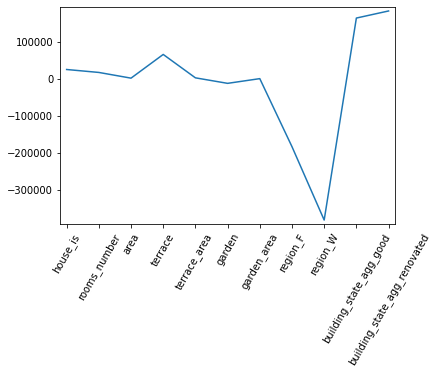

In [120]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.2, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
print(housing_data1.columns)

# Plot the coefficients
plt.plot(range(len(housing_data1.columns)), lasso_coef)
plt.xticks(range(len(housing_data1.columns)), housing_data1.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [124]:
import seaborn as sns

In [121]:
hdf = pd.read_csv('./clean_dataset.csv')

In [123]:
hdf.columns

Index(['source', 'postcode', 'house_is', 'property_subtype', 'price',
       'rooms_number', 'area', 'equipped_kitchen_has', 'furnished',
       'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area',
       'land_surface', 'facades_number', 'swimming_pool_has', 'region',
       'building_state_agg'],
      dtype='object')

In [ ]:
sns.pairplot(hdf)

In [ ]:
hdf.drop(['source', 'postcode', 'property_subtype', 'price',
       'rooms_number', 'area',, 'terrace', 'terrace_area', 'garden', 'garden_area',
       'land_surface', 'facades_number', 'swimming_pool_has', 'region',
       'building_state_agg'])